# Random Forest Trading

---

### Import Libraries and Dependencies

In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in X_test CSV as Pandas DataFrame

In [22]:
# Set path to CSV and read in CSV
csv_path = Path('X_test.csv')
X_test=pd.read_csv(csv_path)
X_test.set_index(pd.to_datetime(X_test['Date'], infer_datetime_format=True), inplace=True)
X_test.drop(columns=['Date'], inplace=True)
X_test.head()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2019-05-08,1.0,-1.0,-1.0
2019-05-09,1.0,1.0,-1.0
2019-05-10,1.0,1.0,-1.0
2019-05-13,1.0,1.0,0.0
2019-05-14,1.0,-1.0,1.0


### Read in y_test CSV (Actual Results) as Pandas DataFrame

In [23]:
# Set path to CSV and read in CSV
csv_path = Path('results.csv')
results = pd.read_csv(csv_path)
results.set_index(pd.to_datetime(results['Date'], infer_datetime_format=True), inplace=True)
results.drop(columns=['Date'], inplace=True)
results.head()

,Positive Return,Actual Value
Date,,
2019-05-08,1.0,1.0
2019-05-09,0.0,1.0
2019-05-10,0.0,1.0
2019-05-13,0.0,1.0
2019-05-14,1.0,1.0


### Load Model and Predict y values from X_test Values

In [37]:
# Load the model and make the predictions from the X_test dataset
model = load('random_forest_model-AAPL.joblib')
predictions = model.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

### Compare Predicted Results to Y_test (Actual Results)

In [38]:
# Add predicted results to DataFrame
results["Predicted Value"] = predictions
results.head(20)

,Positive Return,Actual Value,Predicted Value
Date,,,
2019-05-08,1.0,1.0,1.0
2019-05-09,0.0,1.0,1.0
2019-05-10,0.0,1.0,1.0
2019-05-13,0.0,1.0,1.0
2019-05-14,1.0,1.0,1.0
2019-05-15,1.0,1.0,1.0
2019-05-16,0.0,1.0,1.0
2019-05-17,0.0,1.0,1.0
2019-05-20,0.0,1.0,1.0


### Plot Predicted Results vs. Actual Results

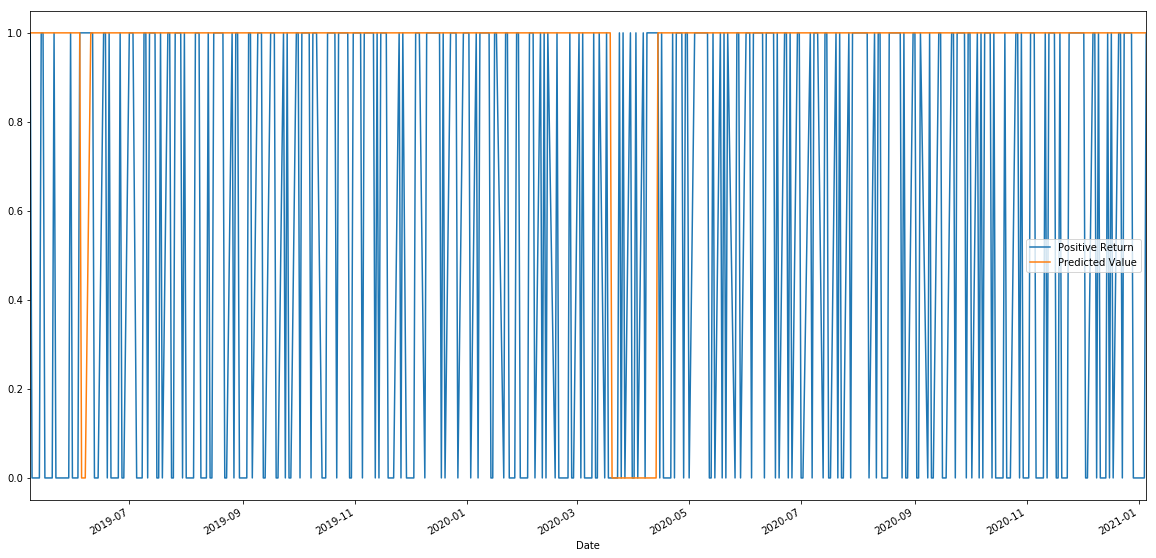

In [39]:
# Plot predicted results vs. actual results
results[['Positive Return', 'Predicted Value']].plot(figsize=(20,10))

### Plot Predicted Results vs. Actual Results (of last 100 records)

In [40]:
X_test.tail(100)

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-08-13,1.0,-1.0,-1.0
2020-08-14,1.0,-1.0,-1.0
2020-08-17,1.0,-1.0,-1.0
2020-08-18,1.0,1.0,-1.0
2020-08-19,1.0,1.0,-1.0
2020-08-20,1.0,1.0,-1.0
2020-08-21,1.0,1.0,-1.0
2020-08-24,1.0,1.0,-1.0
2020-08-25,1.0,1.0,-1.0


In [41]:
results['Predicted Value'].tail(100)

Date
2020-08-13    1.0
2020-08-14    1.0
2020-08-17    1.0
2020-08-18    1.0
2020-08-19    1.0
2020-08-20    1.0
2020-08-21    1.0
2020-08-24    1.0
2020-08-25    1.0
2020-08-26    1.0
2020-08-27    1.0
2020-08-28    1.0
2020-08-31    1.0
2020-09-01    1.0
2020-09-02    1.0
2020-09-03    1.0
2020-09-04    1.0
2020-09-08    1.0
2020-09-09    1.0
2020-09-10    1.0
2020-09-11    1.0
2020-09-14    1.0
2020-09-15    1.0
2020-09-16    1.0
2020-09-17    1.0
2020-09-18    1.0
2020-09-21    1.0
2020-09-22    1.0
2020-09-23    1.0
2020-09-24    1.0
             ... 
2020-11-20    1.0
2020-11-23    1.0
2020-11-24    1.0
2020-11-25    1.0
2020-11-27    1.0
2020-11-30    1.0
2020-12-01    1.0
2020-12-02    1.0
2020-12-03    1.0
2020-12-04    1.0
2020-12-07    1.0
2020-12-08    1.0
2020-12-09    1.0
2020-12-10    1.0
2020-12-11    1.0
2020-12-14    1.0
2020-12-15    1.0
2020-12-16    1.0
2020-12-17    1.0
2020-12-18    1.0
2020-12-21    1.0
2020-12-22    1.0
2020-12-23    1.0
2020-12-24    1.0
2020-

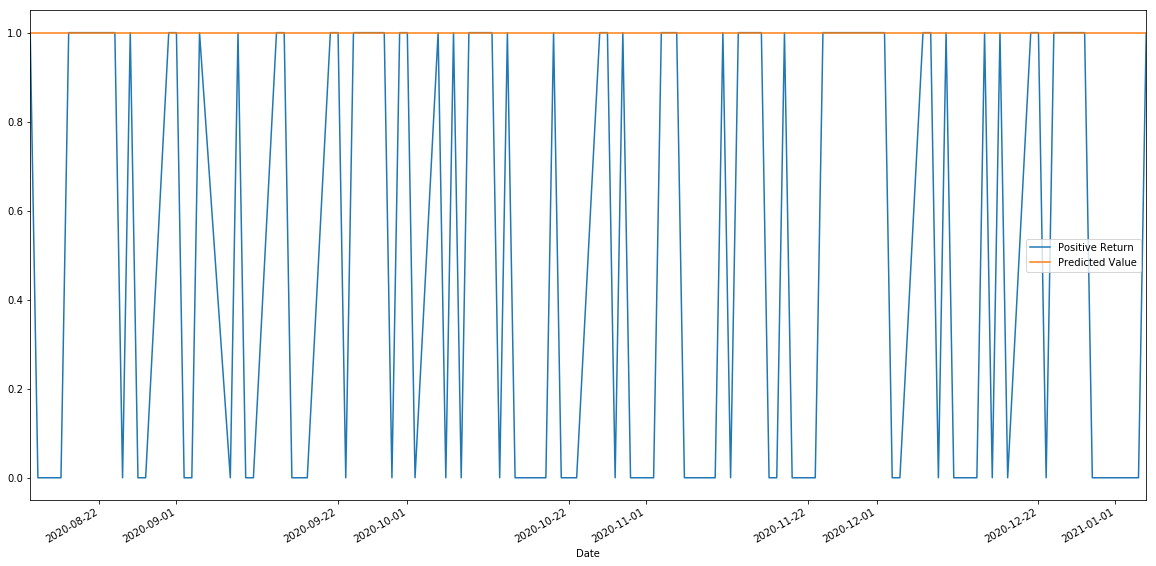

In [42]:
# Plot last 10 records of predicted vs. actual results
results[['Positive Return', 'Predicted Value']].tail(100).plot(figsize=(20,10))

### Replace Predicted Values 0 as -1 (For Shorting)

In [43]:
# Replace predicted values 0 to -1 to account for shorting
results['Predicted Value'].replace(0, -1, inplace=True)
results.tail(50)

,Positive Return,Actual Value,Predicted Value
Date,,,
2020-10-23,0.0,1.0,1.0
2020-10-26,1.0,1.0,1.0
2020-10-27,1.0,1.0,1.0
2020-10-28,0.0,1.0,1.0
2020-10-29,1.0,1.0,1.0
2020-10-30,0.0,1.0,1.0
2020-11-02,0.0,1.0,1.0
2020-11-03,1.0,1.0,1.0
2020-11-04,1.0,1.0,1.0


### Plot Cumulative Returns of Random Forest Model

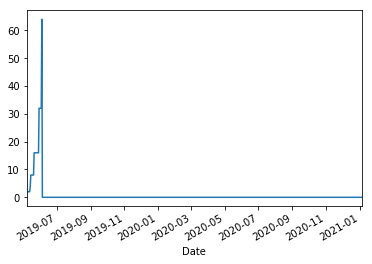

In [44]:
# Calculate cumulative return of model and plot the result
(1 + (results['Positive Return'] * results['Predicted Value'])).cumprod().plot()

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

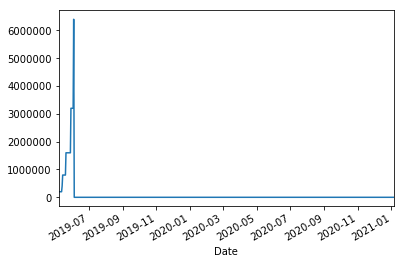

In [45]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (results['Positive Return'] * results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()